# Signal Detection Theory (SDT): Tutorial

__Zhuanghua Shi__ (shi@lmu.de)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_tutorials/w10_signal_detection_theory.ipynb)

## 1. Recall Psychometric function (PF) and Signal Detection Theory (SDT)

The psychometric function (PF) measures human performance on a psychophysical task (e.g., classification) to a given feature of a physical stimulus (e.g., velocity, duration, brightness, etc.). Recall typical classification response is a binary response, and the sensory input is continuous, so the probability of response is a sigmoid function. A general psychometric function includes the chance level and attentional lapses:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$
where $\alpha$ is the threshold, $\beta$ the sensitivity, $\gamma$ the chance level, and $\lambda$ the lapse rate. Parameters can be estimated by using logistic regression. 

## High-threshold theory

Let's imagine a simple two-interval force-choice (2IFC) task in which observers had to identify which interval contains a target. This kind of 2IFC task can be treated as a signal detection paradigm. Let's denote the interval containing the stimulus as $S$ (signal), and the blank interval as $N$ (noise). The below figure illustrates a probability distribution of two signals. 

![High Threshold](https://github.com/strongway/tutorial_data_science/raw/master/figures/high_threshold.png)
_Figure from Kingdom and Prins (2016), Figure 4.7_

Whether or not the sensory process will detect the sitmulus on any trial is determined by the amount of sensory evidence accumulated by the sensory system. Let's assume that the mean amount of accumulated evidence is a linear function of stimulus intensity $x$:

$$\mu(x)=\pi + \rho x$$

According to high-threshold theory, the sensory mechanism will detect the stimulus when the amount of sensory evidence exceeds a fixed internal criterion or threshold. As its name implied, high-threshold theory assumes that the internal threshold is high. More specifically, the threshold is assumed to be high enough such that the probability that the threshold is exceedd when $x=0$ (i.e., noise) is effective zero. The decision is based on binary information only: either the sensory evidence was in excess of the threshold, or the sensory evidence was not in excess of the threshold. Given the assumptions we have made, function $F(x)$, which describes the probability that the threshold will be exceeded by a stimulus of intensity $x$, will be the cumulative normal distribution (see the inset in the above Figure). 

By contrast, there is no such thing as a fixed internal threshold according to SDT. Instead, SDT makes the assumption that sensory mechanism generate a graded signal, corresponding to the degree of sensory evidence accumulated. The decision process has access  to the degree of sensory evidence accumulated on both Signal and Noise. We may think of any presentation of a stimulus as a sample from the probability density function associated with the stimulus. Even in the absence of a stimulus, differing degrees of sensory evidence results, and we may think of the presentation of the noise interval as a sample from the probability density function associated with the noise stimulus. Thus, the decision is based on the relative amplitude of two samples: Signal $N(\pi + \rho x), \sigma^2$, and Noise $N(\pi, \sigma^2)$. 

For 2IFC, one simple decision rule is that if the sample taken during the sitmulus interval has a value greater than the sample taken during the noise interval. That is, if the difference between the sample value derived from the signal interval and the sample value derived from the noise interval exceed zero, the response will be correct. The difference in sensory evidence will be distributed as $N(\rho x, 2 \sigma^2)$. 

## 2. Calculation of d' and bias C for M-AFC

### 2.1 Yes/No 1AFC

Yes/No paradigm, known as 1AFC, is particularly prone to bias. Suppose two observers have the same internal sensitivity, but use different response criteria. Observed psychometric functions would differ a lot between two observers. The SDT can distinguish the response bias from the sensitivity with the following estimates:

$$d' = z(Hit) - z(FA)$$

$$c =-[z(Hit)+z(FA)]/2$$


### 2.2 Unbiased 2IFC

With the standard 2IFC procedure, the N and S+N stimuli are presented together in a trial as two alternatives. Remember that the decision rule is to choose the alternative in which the internal signal is biggest. If the observer adopts this rule, trials in which the _difference_ between the S+N and N samples are positive will result in a correct decision. The variance of the _difference_ is the summation of the variances of the S+N and N. The proportion correct for 2AFC is thus given by the grey area in the lower panel to the right of zero. This is:

$$ P_c = \Phi(d'/\sqrt{2})$$

and 

$$ d' = z(P_c) \sqrt2$$

![2AFC](https://github.com/strongway/tutorial_data_science/raw/master/figures/2afc.jpg)
_Graphical illustration of how d' is calculated from an unbiased 2AFC task. Figure from Kingdom and Prins (2016)_


For the __biased 2IFC__, the calculation is the same as shown in 1AFC. 


## 3. Confusion Matrix and ROC curve

1AFC or 2AFC are essential binary classification. The probabilities of outcomes from S and N define the confusion matrix. 

Response | Signal  |  Noise
-------- | -------  | -------
Yes      | Hit      | FA
No       | Miss     | CR

ROC curve plots with the horizontal axis (FA) and the vertical axis (Hit). On the same ROC curve, Hit/FA with liberal criteria locate at the right-up corner, whereas Hit/FA with conservative criteria locate at the lower-left corner. A ROC curve with high d' relative to low d' has __a larger area under the curve__. Sometimes we also use the Area under the curve (AUC) to measure the sensitity. 

Assuming Gaussian distribution, we have the folling relation between d' and AUX ($A_z$):

$$A_z = \Phi(\frac{d'}{\sqrt 2})$$

Note, sometimes we also use ROC curves and AUCs to select the best logistic regression models. 

## 4. Example: Neural decoding (Britten et al. 1992)

[Britten and collegues (1992)](https://doi.org/10.1523/JNEUROSCI.12-12-04745.1992) compared the ability of psychophysical observers and single cortical neurons to discriminate weak motion signals in a stochastic visual display. 

![RDM](https://github.com/strongway/tutorial_data_science/raw/master/figures/random_dot_motion.jpg)

They recorded money's behavioral responses as well as responses from MT neurons. The following Figure shows frequency histogram of reponses obtained from a single MT neuron at five different correlation levels. The black bars illustrate reponses for null direction motion, while the white bars represent responses for motion in the neuron's preferred direction. We can see clearly the distance between the _signal_ and the _noise_ depends on the motion coherence.  

![MT Neurons responses](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_frequencies.jpg)

Given that one sees a firing rate from that neuron in one trial, how should one decode whether the RDM was moving upward or downward? It depends on the decision criterion! The unbias decision should set the criterion in the middle. 

The below figure plots the ROC curves for the five pairs. Each ROC was generated by increasing the criterion level from 0 to 120 spikes in one-spike increments. Recall the area under the ROC is an alternative measure of the sensitivity, which is shown on the right side of the curve. 

![ROC](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_rocs.jpg)


And you can see from Figure below, the neuron's senstivity curve is very close to the behavioral responses. 

![comparison](https://github.com/strongway/tutorial_data_science/raw/master/figures/britten_comparisons.jpg)



## 5. Practice: Temporal bisection 

The dataset I provide here is the same data that we used in previous tutorial, a study on influence of music tempo on duration judgments. The same dataset we used in the previous tutorial session. 

In the study, same classic music pieces were manipulated and played in three different tempo: slow, medium, and faster. The length of the music piece was randomly select from 2 to 8 seconds. Participants had to judge if the music piece was a 'short' or a 'long' one. Participants had to estimate the 'short' or 'long' based on the past trials they received. The research question is if the music tempo alters the time judgment.  

A sample experimental data that contains three participants' responses can be found [here](https://raw.githubusercontent.com/strongway/r-statistics/master/data/music_bisection.csv).

Please download the data file first to your local folder. Here I put in a subfolder called 'data' in my local computer. 


### Step 1. Load data

Let us first load the data: 

  Participant  Duration  Tempo  Stimuli_Nu  Decision  Music_Duration  resp
0      Sub101         2      1          10         1        2.001604     0
1      Sub101         6      3          10         2        6.000169     1
2      Sub101         5      1           4         2        5.000097     1
3      Sub101         7      1           8         2        7.000105     1
4      Sub101         2      3           1         1        2.000080     0


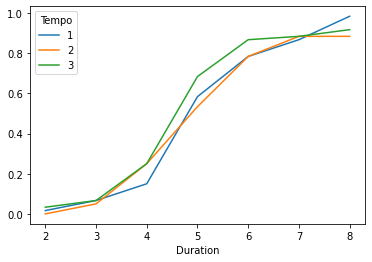

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt

#load data
dat = pd.read_csv('https://raw.githubusercontent.com/strongway/r-statistics/master/data/music_bisection.csv', sep = ';')
dat = dat.assign(resp = dat.Decision -1) # change to 0 to 1 for two categories
print(dat.head())

# quickly visualize responses for three participants
dat.pivot_table( 'resp', 'Duration','Tempo' ).plot()

### Step 2. Data transformation

Note, the study was not designed for the signal detection analysis. However, here we use this data to explore the possibility of using STD from different aspects. Recall, the bisection task is to ask participants to bisect the duration sampled from 2 to 8 seconds into two categories: Short, and Long. 
Here we only analysis two durations that close to the mean duration 5 secs: 4-sec and 6-sec durations, and check if their sensitivity changes across different tempi. 

_Another thought_: we can also analyze all data points, and use the mean duration 5 as the noise signal, while the difference of the other duration relative to 5 seconds as the signal intensity, and we should be able to obtain muliple d' and C across different durations, separated for each tempo. 



In [39]:
# select durations 4 and 6 secs

m_acc = dat.query("Duration == 4 | Duration == 6").assign( # add correct column
         correct = lambda df: df.resp == (df.Duration>5)).groupby( # group for sub, tempo, Duration
             ['Participant', 'Tempo', 'Duration']).agg({'correct':'mean', "Decision": 'count' }).\
             reset_index().rename(columns = {"Decision":"Repetition"}) # calculate mean correct rate


m_acc.head()

,Participant,Tempo,Duration,correct,Repetition
0,Sub101,1,4,1.00,20
1,Sub101,1,6,0.45,20
2,Sub101,2,4,1.00,20
3,Sub101,2,6,0.55,20
4,Sub101,3,4,1.00,20


In [49]:
# spread the Duration (4 vs. 6)
m_acc_s = m_acc.pivot(index = ['Participant','Tempo'], columns = 'Duration', values = 'correct')\
    .reset_index().rename(columns = {4:"Short",6:"Long"})
m_acc_s

Duration,Participant,Tempo,Short,Long
0,Sub101,1,1.00,0.45
1,Sub101,2,1.00,0.55
2,Sub101,3,1.00,0.75
3,Sub102,1,0.70,0.95
4,Sub102,2,0.70,0.90
5,Sub102,3,0.60,0.95
6,Sub103,1,0.85,0.95
7,Sub103,2,0.55,0.90
8,Sub103,3,0.65,0.90


### Step 3. Calculation of d' and C

Recall that for the Two-alternative discrimination task, we have

$$d' = z(P_A) + z(P_B) $$

$$C = -[z(P_A) - z(P_B)]/2$$
Now we can calculate individual $d'$ and $C$. Note, Some observers made perfect responses in some easy conditions. Z-score (`scipy.stats.norm.ppf()`) will get infinite value when the probability is 0 or 1.   For such extreme values (i.e., hit rates of 1 and false-alarm rates of 0), A common method for  adjustments is to apply a small correction ([Macmillan & Kaplan, 1985](https://www.ncbi.nlm.nih.gov/pubmed/4034817); Stanislaw & Todorov, 1999): rates of 0 were replaced by 0.5/n, and rates of 1 by 1–0.5/n, where n is the number of trials, respectively. So you need to adjust a bit, such that the probability $p$ falls into $[0.01,0.99]$. 

Note: `scipy.stats.zscore()` is used for the zscore within the numpy array after normalization, which is different from what we want. 

In [51]:
# we saw there were some 1  let's adjust them
# if you see 0 in both columns, you should adjust them as well. 
m_acc_s[['Short','Long']] = m_acc_s[['Short','Long']].replace(1,1-0.5/20)
m_acc_s

Duration,Participant,Tempo,Short,Long
0,Sub101,1,0.975,0.45
1,Sub101,2,0.975,0.55
2,Sub101,3,0.975,0.75
3,Sub102,1,0.700,0.95
4,Sub102,2,0.700,0.90
5,Sub102,3,0.600,0.95
6,Sub103,1,0.850,0.95
7,Sub103,2,0.550,0.90
8,Sub103,3,0.650,0.90


In [61]:
# now we calculate d' and C
m_acc_s['d'] =stats.norm.ppf(m_acc_s.Short) + stats.norm.ppf(m_acc_s.Long)
m_acc_s['c'] = -(stats.norm.ppf(m_acc_s.Short) - stats.norm.ppf(m_acc_s.Long))/2
m_acc_s

Duration,Participant,Tempo,Short,Long,d,c
0,Sub101,1,0.975,0.45,1.834303,-1.042813
1,Sub101,2,0.975,0.55,2.085625,-0.917151
2,Sub101,3,0.975,0.75,2.634454,-0.642737
3,Sub102,1,0.700,0.95,2.169254,0.560227
4,Sub102,2,0.700,0.90,1.805952,0.378576
5,Sub102,3,0.600,0.95,1.898201,0.695753
6,Sub103,1,0.850,0.95,2.681287,0.304210
7,Sub103,2,0.550,0.90,1.407213,0.577945
8,Sub103,3,0.650,0.90,1.666872,0.448116


### Step 4. Visualization

There was some fluctuation in d', but not much different among three tempi. This requires further statistical test to valide this conclusion. 




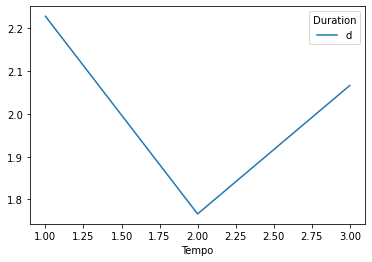

In [63]:
m_acc_s.pivot_table(index = 'Tempo', values = 'd' ).plot()

For response bias, however, we seesome increase of conservative response when the tempo became faster. Here 'conservative' means the criteria sets close to the 'Short' side, meaning more 'Long' responses for the faster tempo.

Again, three subjects can not make any conclusion. 

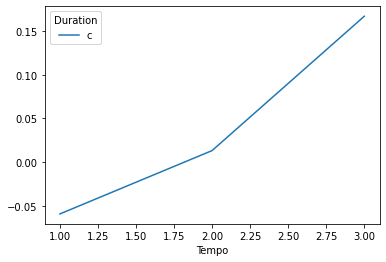

In [64]:
m_acc_s.pivot_table(index = 'Tempo',values = 'c').plot()

## Mini task

Please analyze other duration pairs (3 vs. 7, 2 vs. 8 secs), and compare their d's and biases. 